In [1]:
import os
import numpy as np
import nibabel as nib
from default_resampling import *
from resample_torch import *

In [66]:
from copy import deepcopy
from typing import Union, Tuple, List

import numpy as np
import torch
from einops import rearrange
from torch.nn import functional as F


torch.set_num_threads(16)

img_file = '/home/hasna/miccai24_challenges/epvs_challenge/nnunet_dir/dataset/nnUNet_raw/Dataset101_EPVST2/imagesTr/epvs_t2w_ED_01_06_0000.nii.gz'
seg_file = '/home/hasna/miccai24_challenges/epvs_challenge/nnunet_dir/dataset/nnUNet_raw/Dataset101_EPVST2/labelsTr/epvs_t2w_ED_01_06.nii.gz'
io = SimpleITKIO()
data, pkl = io.read_images((img_file, ))
seg, pkl = io.read_seg(seg_file)

spacing = [1, 1, 5]  #pkl['spacing']
target_shape = compute_new_shape(np.transpose(data, (0, 3, 2, 1)).shape[1:], pkl['spacing'], spacing)  #(15, 256, 312)

use = np.transpose(data, (0, 3, 2, 1))  #data
use_seg = np.transpose(seg, (0, 3, 2, 1))  #data

ret_nosep = resample_torch_fornnunet(use, target_shape, spacing, spacing, is_seg=False)
seg_nosep = resample_torch_fornnunet(use_seg, target_shape, spacing, spacing, is_seg=True)

# ret_sep = resample_torch_fornnunet(use, target_shape, spacing, spacing, is_seg, force_separate_z=False)

In [67]:
np.transpose(ret_nosep, (0, 3, 2, 1))[0].shape

(33, 240, 230)

In [77]:
import SimpleITK as sitk

img_sitk = sitk.GetImageFromArray(np.transpose(ret_nosep, (0, 3, 2, 1))[0])  #(ret_nosep[0])
img_sitk.SetSpacing((1,1,5))
sitk.WriteImage(img_sitk, '/home/hasna/miccai24_challenges/epvs_challenge/epvs_t2w_ED_01_06_0000_tst.nii.gz')

seg_sitk = sitk.GetImageFromArray(np.transpose(seg_nosep, (0, 3, 2, 1))[0])  #(ret_nosep[0])
seg_sitk.SetSpacing((1,1,5))
sitk.WriteImage(seg_sitk, '/home/hasna/miccai24_challenges/epvs_challenge/epvs_t2w_ED_01_06_0000_tstseg.nii.gz')


input_seg = '/home/hasna/miccai24_challenges/epvs_challenge/nnunet_dir/dataset/nnUNet_raw/Dataset101_EPVST2/imagesTr/epvs_t2w_ED_01_06_0000.nii.gz'
TMP_RESAMPLED = '/home/hasna/miccai24_challenges/epvs_challenge/epvs_t2w_ED_01_06_0000_tst2.nii.gz'
input_volume = ''
# f'mri_convert {input_seg} {TMP_RESAMPLED} -rl {input_volume} -rt nearest -odt float'

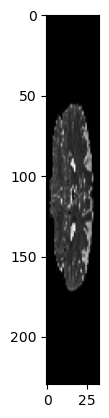

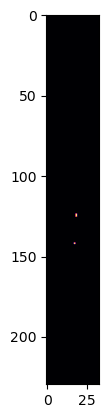

In [76]:
import matplotlib.pyplot as plt

sl = 90
plt.imshow(ret_nosep[0,:,sl,:], cmap='gray')
plt.show()
plt.imshow(seg_nosep[0,:,sl,:], cmap='inferno')

In [14]:
ret_sep.shape

(1, 158, 240, 160)